#MINE-4101: CIENCIA DE DATOS APLICADA - TALLER 4 

Oscar Fernando Bosigas Puerto – 202220008 - o.bosigas

Yeimy Andrea Cano M – 202213304 - y.cano

David Polania Mejia - 202213328 - d.polaniam


In [2]:
#Importaciones necesarias

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#from pandas_profiling import ProfileReport
from datetime import datetime
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# **Entendimiento de los Datos**

Primero se procede a hacer el cargue de los datos que están en el repositorio git del proyecto.

In [3]:
data = pd.read_json('https://raw.githubusercontent.com/yacanom/CDA_taller-4/main/DataSet_Entrenamiento_v1.json')

El diccionario de datos provistos es:

|Field | Description|
| --- | --- |
|customerID | Customer ID|
|gender | Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner| Whether the customer has a partner or not (Yes, No)|
|Dependents| Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService| Whether the customer has a phone service or not (Yes, No)|
|MultipleLines| Whether the customer has multiple lines or not (Yes, No, No phoneservice)|
|InternetService| Customer’s internet service provider (DSL, Fiber optic, No) |
|OnlineSecurity| Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup| Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection| Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport| Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV| Whether the customer has streaming TV or not (Yes, No, No internet service)|
|StreamingMovies| Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract| The contract term of the customer (Month-to-month, One year, Two  year)|
|PaperlessBilling| Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod| The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges| The amount charged to the customer monthly|
|TotalCharges| The total amount charged to the customer|
|Churn| Whether the customer churned or not (Yes or No)|

---




In [4]:
#se identifica el total de datos que se tienen:
data.shape

(6000, 21)

Se hace una exploración a alto nivel de los datos:

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5386-THSLQ,Female,1,Yes,No,66,No,No phone service,DSL,No,...,Yes,No,Yes,No,One year,No,Bank transfer (automatic),45.55,3027.25,No
4,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes


In [6]:
#Conocer los tipos de datos:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6000 non-null   object 
 1   gender            6000 non-null   object 
 2   SeniorCitizen     6000 non-null   int64  
 3   Partner           6000 non-null   object 
 4   Dependents        6000 non-null   object 
 5   tenure            6000 non-null   int64  
 6   PhoneService      6000 non-null   object 
 7   MultipleLines     6000 non-null   object 
 8   InternetService   6000 non-null   object 
 9   OnlineSecurity    6000 non-null   object 
 10  OnlineBackup      6000 non-null   object 
 11  DeviceProtection  6000 non-null   object 
 12  TechSupport       6000 non-null   object 
 13  StreamingTV       6000 non-null   object 
 14  StreamingMovies   6000 non-null   object 
 15  Contract          6000 non-null   object 
 16  PaperlessBilling  6000 non-null   object 


No se identifican datos faltantes. Se tienen 3 variables de tipo numérico: tenure, MonthlyCharges y SeniorCitizen, esta ultima realmente es categórica y tiene dos posibles opciones 0 y 1

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,6000.000000,6000.000000,6000.000000
mean,0.160167,32.320667,64.607233
std,0.366791,24.637296,30.195382
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.000000
50%,0.000000,29.000000,70.300000
75%,0.000000,56.000000,89.850000
max,1.000000,72.000000,118.750000


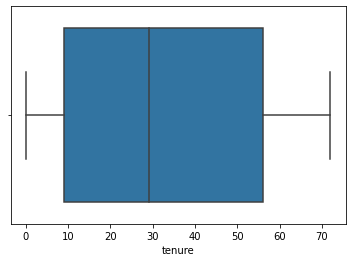

In [8]:
sns.boxplot(x=data["tenure"])

In [14]:
#Ver datos con clientes de 0 años con el servicio:
data[ data['tenure'] == 0 ]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
288,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
553,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
736,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1040,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2831,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3215,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3669,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
4507,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
5859,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
5943,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [15]:
#Ver clientes con más de 56 años con el servicio:
data[ data['tenure'] >= 56 ]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3,5386-THSLQ,Female,1,Yes,No,66,No,No phone service,DSL,No,...,Yes,No,Yes,No,One year,No,Bank transfer (automatic),45.55,3027.25,No
4,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes
6,6728-DKUCO,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,104.15,7303.05,No
9,2848-YXSMW,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.40,1363.25,No
14,5256-SKJGO,Female,0,Yes,Yes,64,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,Yes,Electronic check,54.60,3423.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,8441-SHIPE,Female,0,No,No,67,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),25.60,1790.35,No
5981,4597-ELFTS,Male,0,No,No,56,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.90,1334,Yes
5982,1320-GVNHT,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),108.40,7767.25,No
5988,8071-SBTRN,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Mailed check,111.15,7737.55,No


No se identifican problemas de calidad relacionados con categoría columna "tenure". Se asumen que los clientes en 0 meses, que corresponden a 10 casos son clientes nuevos en la compañia.

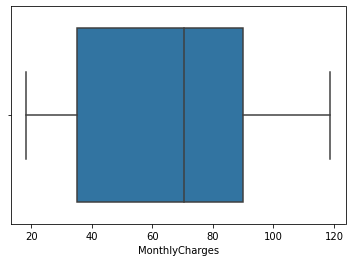

In [9]:
sns.boxplot(x=data["MonthlyCharges"])

Ahora se revisa la calidad de las variables categóricas:



In [21]:
#Confirmar que customerID es única para cada usuario y por lo tanto no se necesitará en el modelo:
data["customerID"].unique().size

6000

In [24]:
#se hace drop de la columna:
data = data.drop(['customerID'], axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Female,1,Yes,No,66,No,No phone service,DSL,No,Yes,Yes,No,Yes,No,One year,No,Bank transfer (automatic),45.55,3027.25,No
4,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes


In [26]:
data["gender"].value_counts()

Male      3049
Female    2951
Name: gender, dtype: int64

Hay un pequeño desbalanceo de datos en la variable 'gender'. Pero por lo demás no se ven problemas de calidad.

In [28]:
data["SeniorCitizen"].value_counts()

0    5039
1     961
Name: SeniorCitizen, dtype: int64

Se observa que existen menos datos para los clientes senior.

In [29]:
data["Partner"].value_counts()

No     3097
Yes    2903
Name: Partner, dtype: int64

En este caso las categorias concuerdan con la opciones que indica el diccionario de datos

In [30]:
data["Dependents"].value_counts()

No     4189
Yes    1811
Name: Dependents, dtype: int64

En este caso las categorias concuerdan con la opciones que indica el diccionario de datos, y se observan más datos para la categoría 'No'

In [31]:
data["PhoneService"].value_counts()

Yes    5410
No      590
Name: PhoneService, dtype: int64

En este caso las categorias concuerdan con la opciones que indica el diccionario de datos,y se observan más datos para la categoría 'Yes'

In [32]:
data["MultipleLines"].value_counts()

No                  2883
Yes                 2527
No phone service     590
Name: MultipleLines, dtype: int64

En este caso las categorias concuerdan con la opciones que indica el diccionario de datos

In [33]:
data["InternetService"].value_counts()

Fiber optic    2624
DSL            2061
No             1315
Name: InternetService, dtype: int64

En este caso las categorias concuerdan con la opciones que indica el diccionario de datos, aunque la categoría No es la que menos datos tiene de las 3.

In [34]:
data["OnlineSecurity"].value_counts()

No                     2965
Yes                    1720
No internet service    1315
Name: OnlineSecurity, dtype: int64

En este caso las categorias concuerdan con la opciones que indica el diccionario de datos, aes desbalanceo de datos entre las 3 opciones es evidente, y dado que se ve relación con el servicio de internet se revisa 

In [ ]:
data["InternetService"].value_counts()

Fiber optic    2624
DSL            2061
No             1315
Name: InternetService, dtype: int64

En este caso las categorias concuerdan con la opciones que indica el diccionario de datos, aunque la categoría No es la que menos datos tiene de las 3.

In [35]:
data["OnlineSecurity"].value_counts()

No                     2965
Yes                    1720
No internet service    1315
Name: OnlineSecurity, dtype: int64

In [36]:
data["OnlineBackup"].value_counts()

No                     2623
Yes                    2062
No internet service    1315
Name: OnlineBackup, dtype: int64

In [37]:
data["DeviceProtection"].value_counts()

No                     2620
Yes                    2065
No internet service    1315
Name: DeviceProtection, dtype: int64

In [38]:
data["TechSupport"].value_counts()      


No                     2950
Yes                    1735
No internet service    1315
Name: TechSupport, dtype: int64

In [39]:
data["StreamingTV"].value_counts()      

No                     2380
Yes                    2305
No internet service    1315
Name: StreamingTV, dtype: int64

In [40]:
data["StreamingMovies"].value_counts()  

No                     2356
Yes                    2329
No internet service    1315
Name: StreamingMovies, dtype: int64

In [41]:
data["Contract"].value_counts()         

Month-to-month    3293
Two year          1459
One year          1248
Name: Contract, dtype: int64

In [43]:
data["PaperlessBilling"].value_counts() 

Yes    3510
No     2490
Name: PaperlessBilling, dtype: int64

In [44]:
data["PaymentMethod"].value_counts()    

Electronic check             2030
Mailed check                 1381
Credit card (automatic)      1299
Bank transfer (automatic)    1290
Name: PaymentMethod, dtype: int64

In [46]:
data["TotalCharges"].value_counts()     

          10
19.75      9
20.2       8
20.05      8
45.3       7
          ..
601.25     1
870.25     1
617.15     1
88.35      1
438.25     1
Name: TotalCharges, Length: 5612, dtype: int64

In [47]:
data["Churn"].value_counts()

No     4408
Yes    1592
Name: Churn, dtype: int64

In [27]:
#Para el preprocesamiento:
#Variable  SeniorCitizen se debe trabajar como categorica
